In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# root path for training data
root_path = ""

In [ ]:
# get all subdirs (labels) in root folder
labels = ["Kombiniert"]

for label in os.listdir(root_path):
    if os.path.isdir(os.path.join(root_path, label)):
        labels.append(label)

labels

In [ ]:
# loop through all subdirs and get picture width for all .jpg files
picture_widths = []

for label in labels:

    if label == "Kombiniert":
        continue

    current_label_widths = []
    current_path = os.path.join(root_path, label)

    for current_file in os.listdir(current_path):
        if current_file[-4:] == ".jpg":

            fullpath = os.path.join(current_path, current_file)

            image = cv2.imread(fullpath)

            try:
                current_label_widths.append(image.shape[1])
            except:
                print("ERROR:", fullpath)

    picture_widths.append(current_label_widths)

In [ ]:
combined_list = []
for i in range(len(picture_widths)):
    for value in picture_widths[i]:
        combined_list.append(value)

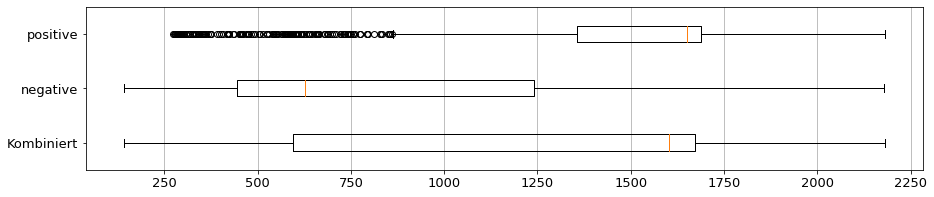

In [6]:
plt.figure(figsize =(15, 3))
plt.rc('font', size=13)
bp_data = plt.boxplot((combined_list, picture_widths[0], picture_widths[1]), vert = 0)
plt.yticks(range(1, len(labels) + 1), labels, rotation='horizontal')
plt.grid(axis="x")
plt.show()

In [7]:
print(len(picture_widths[0]),len(picture_widths[1]),len(combined_list))

704 1130 1834


In [10]:
current_index = 0
whiskers_index = 0

"""
print("whiskers")
[print(item.get_xdata()) for item in bp_data['whiskers']]

print("boxes")
[print(item.get_xdata()) for item in bp_data['boxes']]

print("medians")
[print(item.get_xdata()) for item in bp_data['medians']]
"""

print()

for label in labels:

    whiskers = list(bp_data["whiskers"][whiskers_index].get_xdata())
    [whiskers.append(item) for item in list(bp_data["whiskers"][whiskers_index+1].get_xdata())]
    whiskers.sort()

    print("-----",label,"-----")

    print("Lower Whisker :", whiskers[0])
    print("25 % Quantil  :", bp_data["boxes"][current_index].get_xdata()[0])
    print("Median        :", bp_data["medians"][current_index].get_xdata()[0])
    print("75 % Quantil  :", bp_data["boxes"][current_index].get_xdata()[2])
    print("Upper Whisker :", whiskers[3])

    print()
    current_index += 1
    whiskers_index += 2

#[item.get_ydata() for item in data['whiskers']]
#[print(item.get_xdata()) for item in bp_data['fliers']]


----- Kombiniert -----
Lower Whisker : 141.0
25 % Quantil  : 595.0
Median        : 1603.0
75 % Quantil  : 1672.0
Upper Whisker : 2180.0

----- negative -----
Lower Whisker : 141.0
25 % Quantil  : 444.5
Median        : 627.5
75 % Quantil  : 1240.25
Upper Whisker : 2179.0

----- positive -----
Lower Whisker : 862.0
25 % Quantil  : 1356.75
Median        : 1652.0
75 % Quantil  : 1687.0
Upper Whisker : 2180.0

